In [26]:
from compare_solutions import load_competiton_solution, load_my_solution, load_my_solution_layer, plot_diff_heatmap, plot_one_unit
import numpy as np
import torch

In [27]:
output_path = "data/starting_kit/Train_Data/instance_2021_Q1_1/OutputData.json"
competition_solution = load_competiton_solution(output_path)
my_solution_path = "ed_solution_layer.pkl"
my_solution = load_my_solution_layer(my_solution_path)
my_solution_cvx = load_my_solution("ed_solution_again.pkl")

In [28]:
for key, value in competition_solution.items():
    if key not in ["thermal_units_names", "profiled_units_names", "storage_units_names"]:
        a = competition_solution[key]
        b = my_solution_cvx[key] if isinstance(my_solution_cvx[key], np.ndarray) else my_solution_cvx[key].cpu().numpy()
        comparison = np.isclose(
            a, b, atol=1e-4
        )
        accuracy =100 * np.sum(comparison) / comparison.size
        print(f"Variable: {key}, Accuracy: {accuracy:.4f}")

Variable: profiled_generation, Accuracy: 100.0000
Variable: thermal_generation, Accuracy: 98.8834
Variable: charge_rate, Accuracy: 87.6984
Variable: discharge_rate, Accuracy: 87.2024
Variable: storage_level, Accuracy: 50.7937
Variable: curtailment, Accuracy: 90.2778


In [29]:
diff = my_solution["profiled_generation"].squeeze(0).numpy() - competition_solution["profiled_generation"]
print(f"Max difference in profiled_generation: {np.max(np.abs(diff))}")

Max difference in profiled_generation: 0.10051328124995962


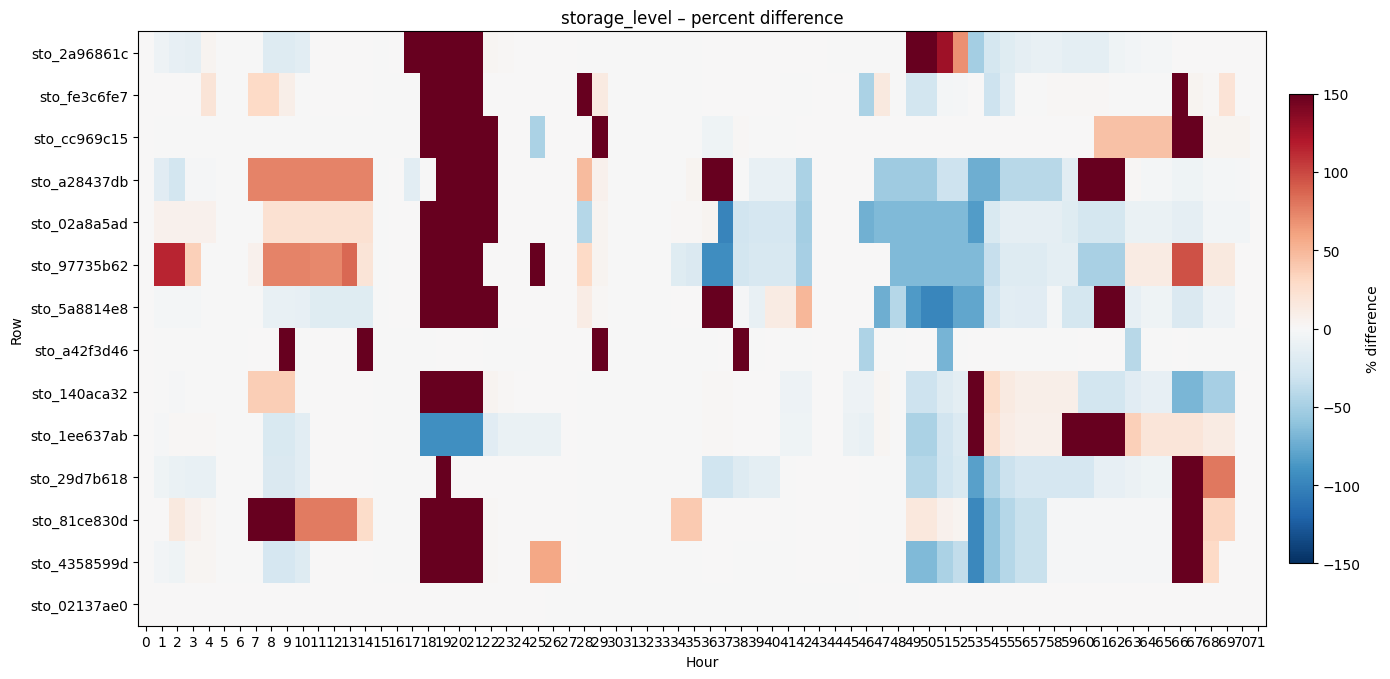

In [34]:
plot_diff_heatmap("storage_level", my_solution_cvx, competition_solution)

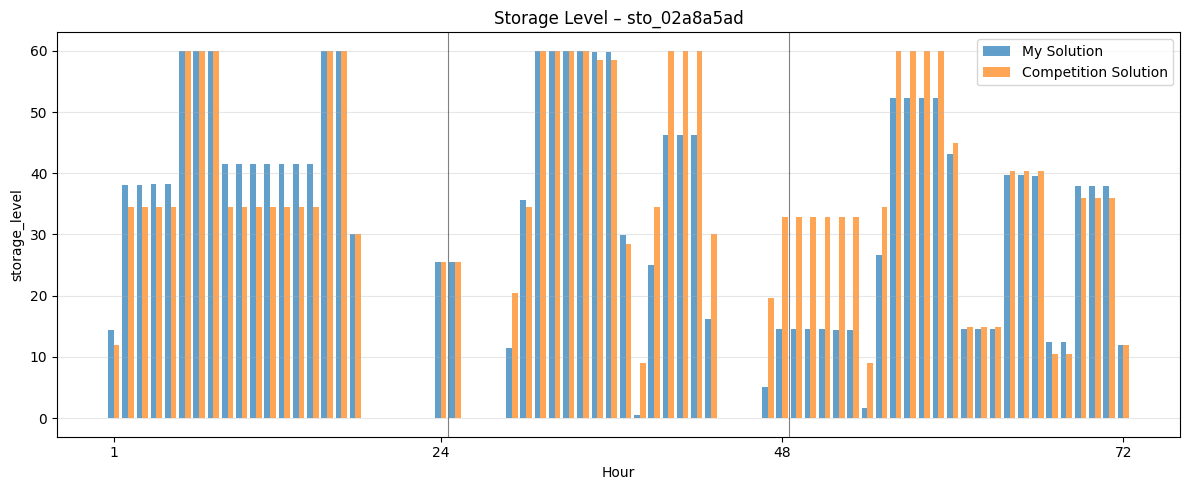

In [35]:
plot_one_unit("storage_level", "sto_02a8a5ad", my_solution, competition_solution)

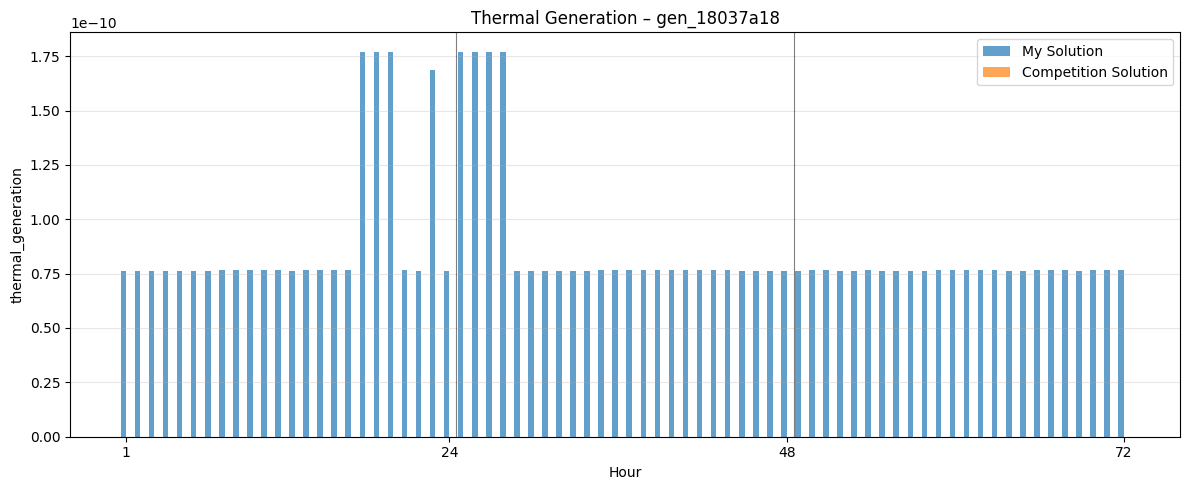

In [33]:
plot_one_unit("thermal_generation", "gen_18037a18", my_solution_cvx, competition_solution)